# Introduction to Probability

## Introduction

Probabilities appear in everyday life and feed into how we make decisions. For example:

- The weather forecast might say that “tomorrow there is a 70% chance of rain". This 70% chance of rain is a probability, and if it is sufficiently high, then we may want to bring an umbrella when we go outdoors.

- We could predict that the probability of car traffic is higher during rush hour than otherwise, so if we don't want to be stuck in traffic while driving, we should avoid driving during rush hour.

We aim to build computer programs that can reason with probabilities.

## A First Look at Probability

Perhaps the simplest example of probability is flipping a fair coin for which we say that the probability of heads is 1/2 and, similarly, the probability of tails is also 1/2. (Don't worry, we'll see much more exciting problems soon!) What do we mean when we say that the probability of heads is 1/2?

The basic idea is that if we repeat this experiment of flipping a coin a huge number of times, say, $n$ , then the number of heads we should see should be close to $n/2$ as we increase $n$. While you could certainly try this out in real life by flipping a coin, say, 100,000 times, doing this would be disastrously tedious. Let's simulate these flips in Python instead.

## Simulating Coin Flips

Let's start by importing the package comp_prob_inference:

In [8]:
import comp_prob_inference

To simulate flipping a fair coin, enter:

In [2]:
comp_prob_inference.flip_fair_coin()

'heads'

You should get either 'heads' or 'tails'. Try re-running the above line a few times. You should see that the coin flip results are random.

To flip the fair coin 100 times, enter:

In [3]:
flips = comp_prob_inference.flip_fair_coins(100)

Let's plot how many times we see the two possible outcomes in the same bar graph, called a histogram:

For example, we get the following plot:


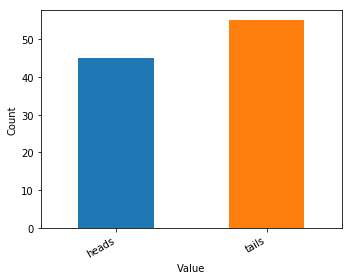

In [10]:
comp_prob_inference.plot_discrete_histogram(flips)

print('For example, we get the following plot:')

Often what we will care about in this course is the fraction (also called the frequency of times an outcome happens. To plot the fraction of times heads or tails occurred, we again use the plot_discrete_histogram function but now add the keyword argument frequency=True:

Doing so, we get the following plot:


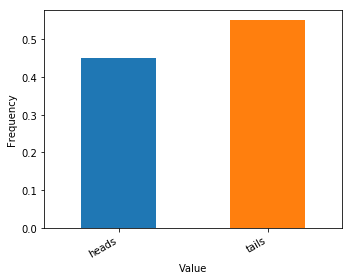

In [11]:
comp_prob_inference.plot_discrete_histogram(flips, frequency=True)

print('Doing so, we get the following plot:')

Next, let's plot the fraction of heads as a function of the number of flips (going up to 100,000 flips).

In [6]:
n = 100000
heads_so_far = 0
fraction_of_heads = []
for i in range(n):
    if comp_prob_inference.flip_fair_coin() == 'heads':
        heads_so_far += 1
    fraction_of_heads.append(heads_so_far / (i+1))

Note that fraction_of_heads[i] tells us what the fraction of heads is after the first i tosses. Then to actually plot the fraction of heads vs the number of tosses, enter the following:

For example, when we run this we get the following plot:


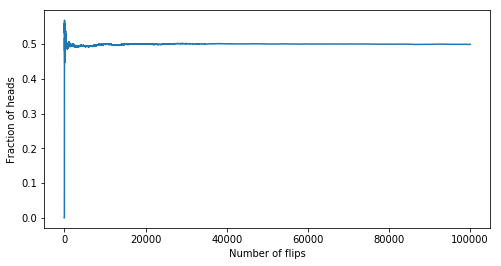

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(range(1, n+1), fraction_of_heads)
plt.xlabel('Number of flips')
plt.ylabel('Fraction of heads');

print('For example, when we run this we get the following plot:')

The fraction of heads initially can be far from 1/2 but as the number of flips increases, the fraction stabilizes and gets closer to 1/2, the probability of heads.

__Computer note__: Many times in this course, it will be helpful to run simulations to test code and plot histograms for different outcomes to get a sense of how likely the outcomes are. Simulations and visualizations can be powerful not only in making sure your code is working correctly but also to present results to people!

## Probability and the Art of Modeling Uncertainty

Since probability effectively corresponds to a fraction, it is a value between 0 and 1. Of course, we can have impossible events that have probability 0, or events that deterministically happen and thus have probability 1. Each time we model uncertainty in the world, there will be some underlying experiment (such as flipping a coin in our running example). An event happens with probability $q \in [0, 1]$ if in a massive number of repeats of the experiment, the event happens roughly a fraction $q$ of the time; more repeats of the experiment make it so that the fraction gets closer to $q$.

Some times, an underlying experiment cannot possibly be repeated. Take for instance weather forecasting. Whereas we could actually physically flip a coin many times to repeat the same experiment, we cannot physically repeat a real-life experiment for what different realizations of tomorrow's weather will be. We could wait until tomorrow to see the weather, but then we would need a time machine to go back in time by one day to repeat and see what the weather is like tomorrow (and this assumes that there's some inherent randomness in tomorrow's weather)! In such a case, our only hope is to somehow model or simulate tomorrow's weather given measurements up to present time.

Different people could model the same real world problem differently! Throughout the course, a recurring challenge in building computer programs that reason probabilistically is figuring out how to model real-world problems. A good model — even if not actually accurate in describing, for instance, the science behind weather — enables us to make good predictions.

Once a weather forecaster has anchored some way of modeling or simulating weather, then if it claims that there's a 30% chance of rain tomorrow, we could interpret this as saying that using their way of _simulating tomorrow's weather_, in roughly 30% of simulated results for tomorrow's weather, there is rain.